Go to directory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR
change disp_unit = radian due to rewrapping
reading height data from file: ./INPUTS/geometryRadar.h5 ...
reading azimuthCoord data from file: ./INPUTS/geometryGeo.h5 ...
reading rangeCoord data from file: ./INPUTS/geometryGeo.h5 ...


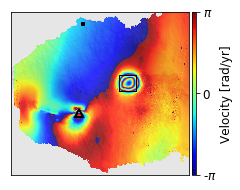

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp, utils as ut
from pysar.simulation.plot import *
from pysar import view

work_dir = '~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]
out_file = '{}_avgPhaseVel.png'.format(proj_name)

fig, ax = plt.subplots(figsize=[4, 3])

## call view.prep/plot_2d_matrix to plot velocity map
print_msg = False
cmd  = 'view.py avgPhaseVelocity.h5 -m maskSpatialCoh.h5 --wrap '
cmd += ' -d ./INPUTS/geometryRadar.h5 --dem-nocontour --ref-size 3 '
cmd += ' --fontsize 12 --notitle '
cmd += ' -o {} --notick'.format(out_file)
d_v, atr, inps = view.prep_2d_matrix(cmd, print_msg=print_msg)
inps.cbar_label = 'Velocity [rad/yr]'
ax, inps, im, cbar = view.plot_2d_matrix(ax, d_v, atr, inps, print_msg=print_msg)

## Mark AOI for network modification
fl = open('ifgramStack_coherence_spatialAvg.txt', 'r')
lines = fl.readlines()
fl.close()
aoi_line = [i for i in lines if '# AOI box:' in i][0]
x0, y0, x1, y1 = [int(i.strip()) for i in aoi_line.split('# AOI box: (')[1].strip().split(")")[0].split(',')]
xx = [x0, x1, x1, x0, x0]
yy = [y0, y0, y1, y1, y0]
ax.plot(xx, yy, 'k-', linewidth=1)

## Mark Point for extended DEM error correction
lat, lon = -0.928, -91.270
coord = ut.coordinate(atr, lookup_file='./INPUTS/geometryGeo.h5')
y, x = coord.geo2radar(lat, lon)[0:2]
ax.plot(x, y, "k^", mfc='none', mew=2, ms=8)

plt.savefig(out_file,  bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()